In [1]:
#导入各种程序包
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
from sklearn.model_selection import train_test_split  

In [2]:
##划分训练集与测试集
from sklearn.datasets import load_iris
iris = load_iris()
X_train=iris.data
y_train=iris.target
X_train,X_test,y_train,y_test=train_test_split(X_train,y_train,
    test_size=0.4,random_state=0,stratify=y_train)

In [47]:
#三维
def plot_LDA(converted_X,y):
    '''
    绘制经过 LDA 转换后的数据
    :param converted_X: 经过 LDA转换后的样本集(150,3)降维后的表示方法
    :param y: 样本集的标记(150,1)
    :return:  None
    '''
    from mpl_toolkits.mplot3d import Axes3D
    fig=plt.figure()
    ax=Axes3D(fig)
    colors=['dodgerblue','lime','darkorange']
    target_names = iris.target_names
    markers='o*s'
 
    for target,color,marker,target_name in zip([0,1,2],colors,markers,target_names):  #zip()方法用在for循环中，支持并行迭代
        pos=(y==target).ravel()  #由标签转换为bool矩阵，分成不同标签类型的矩阵(150,) ravel平铺用于拆分数据
        X=converted_X[pos,:]        # 取出对应pos中True的元素，目的是将降维后的数据拆分为三类X(50,3)---》50行数据正好下面可以取每一列共50
 
        ax.scatter(X[:,0], X[:,1], X[:,2],color=color,marker=marker,  #  X[:,0]取出第一列的数据
           label=target_name)# label="Label %d"%target
 
    ax.legend(loc="best")
    fig.suptitle("After LDA")
def plot_LDA1(converted_X,y):
    '''
    绘制经过 LDA 转换后的数据
    :param converted_X: 经过 LDA转换后的样本集(150,3)降维后的表示方法
    :param y: 样本集的标记(150,1)
    :return:  None
    '''
    from mpl_toolkits.mplot3d import Axes3D
    fig=plt.figure()
    ax=Axes3D(fig)
    colors=['dodgerblue','lime','darkorange']
    target_names = iris.target_names
    markers='o*s'
 
    for target,color,marker,target_name in zip([0,1,2],colors,markers,target_names):  #zip()方法用在for循环中，支持并行迭代
        pos=(y==target).ravel()  #由标签转换为bool矩阵，分成不同标签类型的矩阵(150,) ravel平铺用于拆分数据
        X=converted_X[pos,:]        # 取出对应pos中True的元素，目的是将降维后的数据拆分为三类X(50,3)---》50行数据正好下面可以取每一列共50
 
        ax.scatter(X[:,0], X[:,1], X[:,2],color=color,marker=marker,  #  X[:,0]取出第一列的数据
           label=target_name)# label="Label %d"%target
 
    ax.legend(loc="best")
    fig.suptitle("Before LDA")

[2 2 0 2 0 0 0 2 1 1 0 2 2 0 1 2 1 0 2 2 1 0 2 0 1 1 2 0 1 2 0 2 1 1 2 0 2
 1 1 2 1 0 1 2 2 1 1 0 0 0 0 2 1 0 0 1 2 0 1 1]
[2 2 0 2 0 0 0 2 1 1 0 2 2 0 1 2 1 0 2 2 1 0 2 0 1 1 2 0 1 2 0 2 1 1 2 0 2
 1 1 2 1 0 1 2 2 1 1 0 0 0 0 2 1 0 0 1 2 0 1 1]


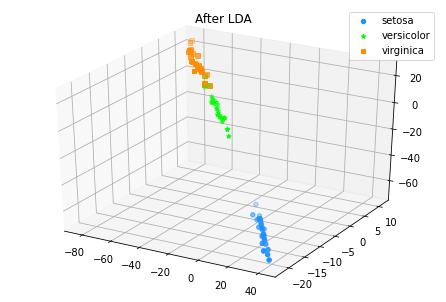

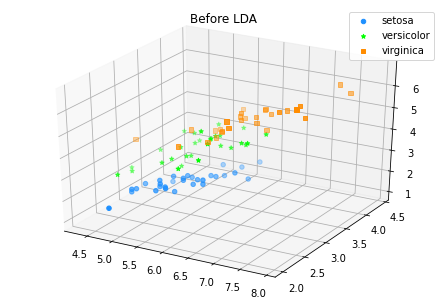

In [50]:
clf.fit(X_train,y_train) 
# converted_X(150,3) 对数据降维了    权值lda.coef_(3, 4)  lda.intercept_(3,)
converted_X=np.dot(X_train,np.transpose(clf.coef_))+clf.intercept_  # X*权值+偏置b  就是输出值
plot_LDA(converted_X,y_train)
#最初未转化的三维的情况
plot_LDA1(X_train,y_train)
y_pred = clf.predict(X_test)
print(y_pred)
print(y_test)

In [7]:
#评估
# 分类报告：precision/recall/fi-score/均值/分类个数
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))


              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        20
     class 1       1.00      1.00      1.00        20
     class 2       1.00      1.00      1.00        20

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [8]:
#准确率
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [10]:
# 混淆矩阵
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[20,  0,  0],
       [ 0, 20,  0],
       [ 0,  0, 20]], dtype=int64)

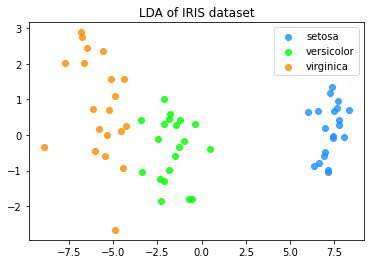

In [51]:
#二维
#数据训练
lda = LinearDiscriminantAnalysis(n_components=2)
X_transform = lda.fit(X_train, y_train).transform(X_test)
y_pred = lda.predict(X_test)
#绘图
colors=['dodgerblue','lime','darkorange']
plt.figure()
target_names = iris.target_names
lw=2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_transform[y_pred == i, 0], X_transform[y_pred == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')
plt.show()

In [52]:
#评估
# 分类报告：precision/recall/fi-score/均值/分类个数
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        20
     class 1       1.00      1.00      1.00        20
     class 2       1.00      1.00      1.00        20

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



In [53]:
#准确率
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

1.0

In [54]:
# 混淆矩阵
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[20,  0,  0],
       [ 0, 20,  0],
       [ 0,  0, 20]], dtype=int64)